/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


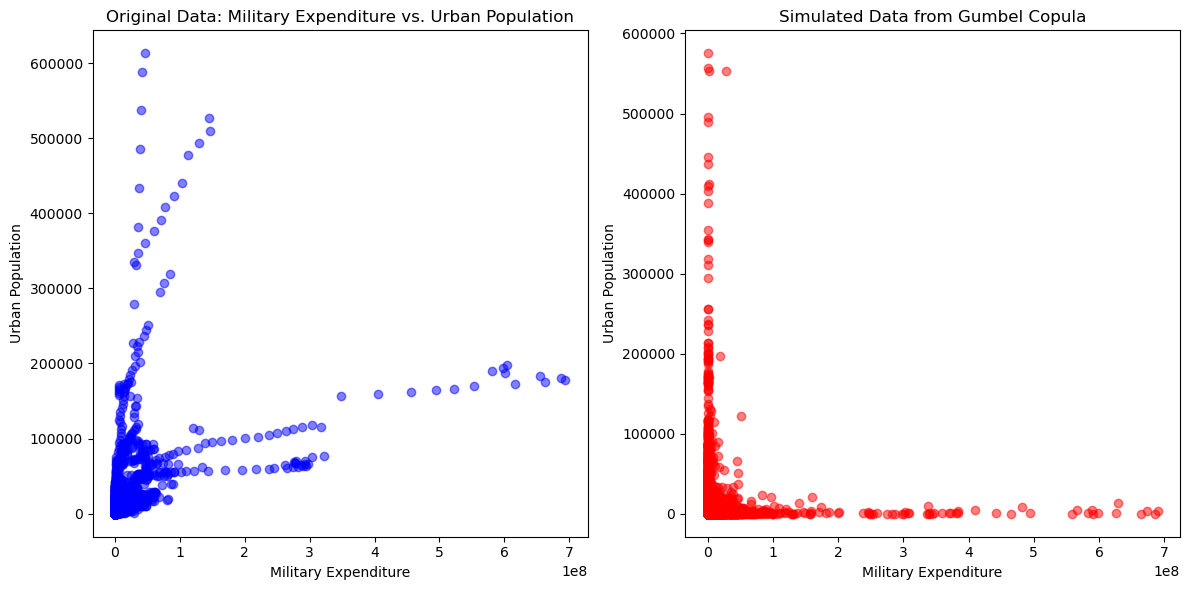

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r
from sklearn.preprocessing import QuantileTransformer

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# Load and clean data

data = pd.read_csv("/Users/kylejonespatricia/Downloads/NMC_Documentation-6.0/NMC-60-abridged/NMC-60-abridged.csv")


# Preprocess the data: Drop missing values and select relevant columns
data_clean = data[['milex', 'upop']].dropna()

# Use QuantileTransformer to transform data into uniform distribution for copula modeling
scaler = QuantileTransformer()
data_scaled = scaler.fit_transform(data_clean)

# Function to simulate Gumbel copula
def simulate_gumbel_copula(n, theta=1.5):
    u1 = gumbel_r.rvs(loc=0, scale=1, size=n)
    u2 = gumbel_r.rvs(loc=0, scale=1, size=n)

    # Apply the Gumbel copula dependency structure formula
    u1_copula = gumbel_r.cdf(u1)
    u2_copula = gumbel_r.cdf(u2)

    return np.column_stack([u1_copula, u2_copula])

# Simulate Gumbel copula data
simulated_data_copula = simulate_gumbel_copula(len(data_scaled))

# Inverse transform the copula data back to original scale using the QuantileTransformer
simulated_data_original = scaler.inverse_transform(simulated_data_copula)

# Visualize the original data vs. simulated data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data_clean['milex'], data_clean['upop'], color='blue', alpha=0.5)
plt.title('Original Data: Military Expenditure vs. Urban Population')
plt.xlabel('Military Expenditure')
plt.ylabel('Urban Population')

# Plot simulated data
plt.subplot(1, 2, 2)
plt.scatter(simulated_data_original[:, 0], simulated_data_original[:, 1], color='red', alpha=0.5)
plt.title('Simulated Data from Gumbel Copula')
plt.xlabel('Military Expenditure')
plt.ylabel('Urban Population')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


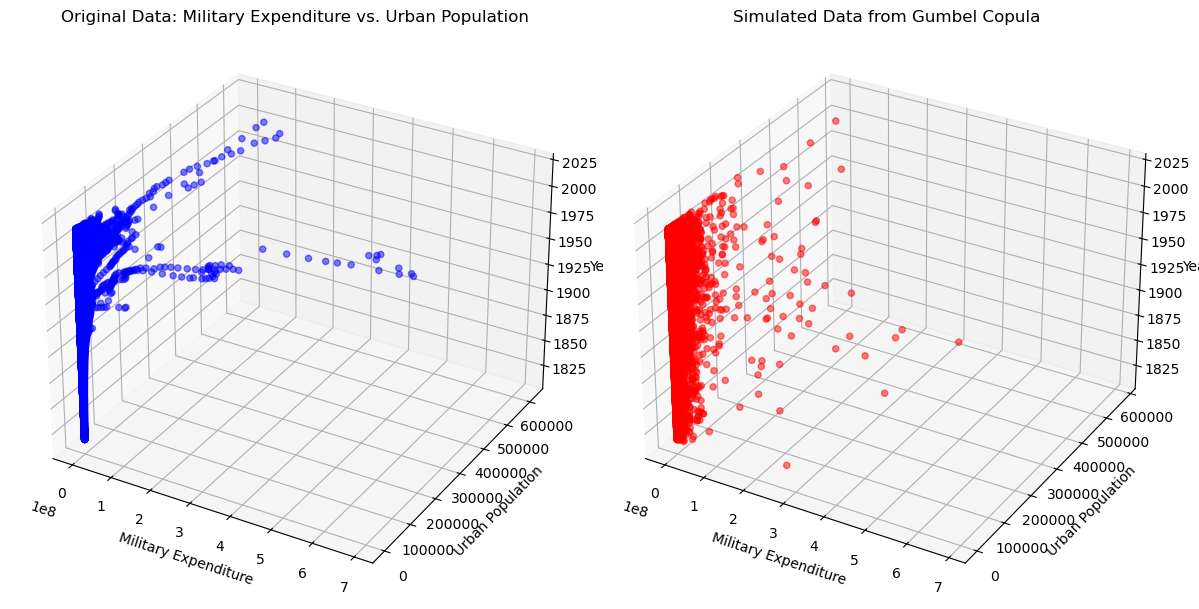

In [7]:

from mpl_toolkits.mplot3d import Axes3D

# Load data (make sure to update the file path accordingly)


# Preprocess the data: Drop missing values and select relevant columns
data_clean = data[['milex', 'upop', 'year']].dropna()

# Use QuantileTransformer to transform data into uniform distribution for copula modeling
scaler = QuantileTransformer()
data_scaled = scaler.fit_transform(data_clean[['milex', 'upop']])

# Function to simulate Gumbel copula
def simulate_gumbel_copula(n, theta=1.5):
    u1 = gumbel_r.rvs(loc=0, scale=1, size=n)
    u2 = gumbel_r.rvs(loc=0, scale=1, size=n)

    # Apply the Gumbel copula dependency structure formula
    u1_copula = gumbel_r.cdf(u1)
    u2_copula = gumbel_r.cdf(u2)

    return np.column_stack([u1_copula, u2_copula])

# Simulate Gumbel copula data
simulated_data_copula = simulate_gumbel_copula(len(data_scaled))

# Inverse transform the copula data back to original scale using the QuantileTransformer
simulated_data_original = scaler.inverse_transform(simulated_data_copula)

# Visualize the original and simulated data in 3D
fig = plt.figure(figsize=(12, 6))

# Plot original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_clean['milex'], data_clean['upop'], data_clean['year'], color='blue', alpha=0.5)
ax1.set_title('Original Data: Military Expenditure vs. Urban Population')
ax1.set_xlabel('Military Expenditure')
ax1.set_ylabel('Urban Population')
ax1.set_zlabel('Year')

# Plot simulated data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(simulated_data_original[:, 0], simulated_data_original[:, 1], data_clean['year'], color='red', alpha=0.5)
ax2.set_title('Simulated Data from Gumbel Copula')
ax2.set_xlabel('Military Expenditure')
ax2.set_ylabel('Urban Population')
ax2.set_zlabel('Year')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


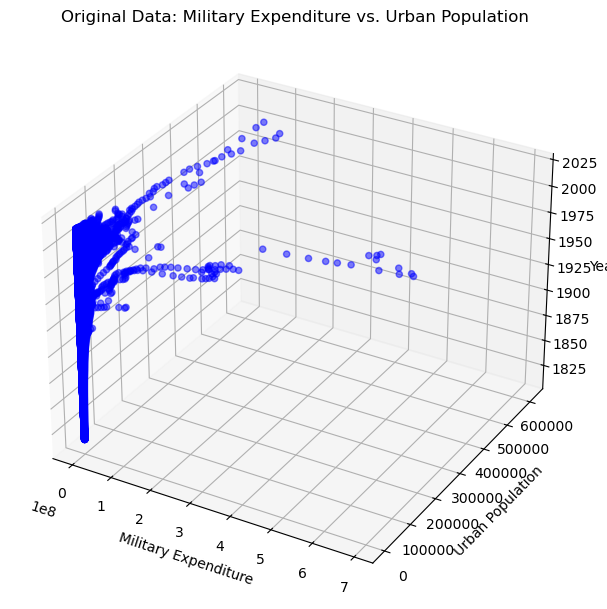

In [11]:

from mpl_toolkits.mplot3d import Axes3D

# Load data (make sure to update the file path accordingly)


# Preprocess the data: Drop missing values and select relevant columns
data_clean = data[['milex', 'upop', 'year']].dropna()

# Use QuantileTransformer to transform data into uniform distribution for copula modeling
scaler = QuantileTransformer()
data_scaled = scaler.fit_transform(data_clean[['milex', 'upop']])

# Function to simulate Gumbel copula
def simulate_gumbel_copula(n, theta=1.5):
    u1 = gumbel_r.rvs(loc=0, scale=1, size=n)
    u2 = gumbel_r.rvs(loc=0, scale=1, size=n)

    # Apply the Gumbel copula dependency structure formula
    u1_copula = gumbel_r.cdf(u1)
    u2_copula = gumbel_r.cdf(u2)

    return np.column_stack([u1_copula, u2_copula])

# Simulate Gumbel copula data
simulated_data_copula = simulate_gumbel_copula(len(data_scaled))

# Inverse transform the copula data back to original scale using the QuantileTransformer
simulated_data_original = scaler.inverse_transform(simulated_data_copula)

# Visualize the original and simulated data in 3D
fig = plt.figure(figsize=(12, 6))

# Plot original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_clean['milex'], data_clean['upop'], data_clean['year'], color='blue', alpha=0.5)
ax1.set_title('Original Data: Military Expenditure vs. Urban Population')
ax1.set_xlabel('Military Expenditure')
ax1.set_ylabel('Urban Population')
ax1.set_zlabel('Year')


# Enable interactive plotting
plt.tight_layout()
plt.show()
